In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import math
import xgboost as xgb
plt.rcParams['axes.unicode_minus'] = False

rc('font', family='AppleGothic')

In [2]:
train = pd.read_csv("./Kor_Train_교통사망사고정보(12.1~17.6).csv")
print(train.shape)
train.head()

(25037, 27)


,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2017,2017063023,14,야간,금,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,보행자,보행자,967633,1937456,127.134130,37.435704
1,2017,2017063021,45,야간,금,1,4,2,1,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,966456,1696405,127.131220,35.262534
2,2017,2017063021,50,야간,금,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,보행자,보행자,900057,1865697,126.379922,36.784142
3,2017,2017063019,10,야간,금,1,1,0,0,0,...,교차로,교차로부근,승용차,승용차,이륜차,이륜차,1095230,1764891,128.554945,35.875973
4,2017,2017063017,2,주간,금,1,2,1,0,0,...,단일로,교량위,이륜차,이륜차,화물차,화물차,947576,1946355,126.906786,37.514993


In [3]:
test = pd.read_csv("./test_kor.csv")
print(test.shape)
test.head()

(50, 16)


,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류
0,야간,금,NaN,NaN,0.0,NaN,0.0,경기,화성시,차대차,측면충돌,중앙선 침범,단일로,기타단일로,승용차,승합차
1,야간,금,NaN,NaN,0.0,NaN,0.0,전남,영암군,차대사람,차도통행중,과속,단일로,기타단일로,승용차,보행자
2,야간,월,1.0,NaN,NaN,0.0,NaN,전남,곡성군,차량단독,전도전복,안전운전 의무 불이행,단일로,기타단일로,자전거,없음
3,야간,일,2.0,NaN,NaN,1.0,NaN,대구,달성군,차대차,측면충돌,중앙선 침범,단일로,기타단일로,승용차,승합차
4,주간,목,1.0,NaN,NaN,NaN,0.0,전남,고흥군,차대차,정면충돌,중앙선 침범,단일로,기타단일로,화물차,화물차


## preprecess

In [4]:
train_측면충돌 = train.loc[train["사고유형_중분류"] == "측면충돌"]
train_측면직각충돌 = train.loc[train["사고유형_중분류"] == "측면직각충돌"]

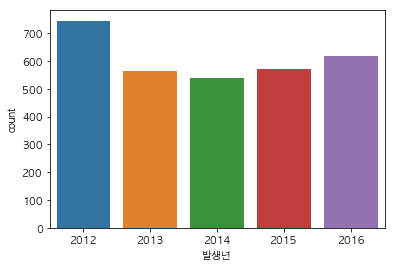

In [5]:
sns.countplot(data=train_측면직각충돌, x="발생년")

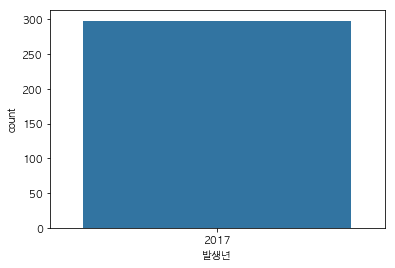

In [6]:
sns.countplot(data=train_측면충돌, x="발생년")

In [7]:
train.loc[train["사고유형_중분류"] == "측면직각충돌", "사고유형_중분류"] = "측면충돌"

## fillin_사고유형_대분류

In [8]:
# feature columns : 당사종별_2당_대분류

In [9]:
train["당사자종별_2당_대분류_보행자"] = train["당사자종별_2당_대분류"] == "보행자"
train["당사자종별_2당_대분류_없음"] = train["당사자종별_2당_대분류"] == "없음"

test["당사자종별_2당_대분류_보행자"] = test["당사자종별_2당_대분류"] == "보행자"
test["당사자종별_2당_대분류_없음"] = test["당사자종별_2당_대분류"] == "없음"

In [10]:
feature_names = ["당사자종별_2당_대분류_보행자", "당사자종별_2당_대분류_없음"]
label_name = "사고유형_대분류"

In [11]:
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]

In [12]:
model = xgb.XGBClassifier()

In [13]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [14]:
predictions = model.predict(X_test)
test["result_사고유형_대분류"] = predictions
test.loc[test["사고유형_대분류"].isnull(), "사고유형_대분류"] = test["result_사고유형_대분류"]

/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## fillin_도로형태_대분류

### part1

In [15]:
# feature columns : 도로형태

In [16]:
train["도로형태_단일로"] = train["도로형태"] == "교차로내"
train["도로형태_교차로"] = train["도로형태"] == "기타단일로"

test["도로형태_단일로"] = test["도로형태"] == "교차로내"
test["도로형태_교차로"] = test["도로형태"] == "기타단일로"

In [17]:
feature_names = ["도로형태_단일로", "도로형태_교차로"]
label_name = "도로형태_대분류"

In [18]:
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]

In [19]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [20]:
predictions = model.predict(X_test)
test["result_도로형태_대분류"] = predictions
test.loc[(test["도로형태_대분류"].isnull()) & (test["도로형태"].notnull()), "도로형태_대분류"] = test["result_도로형태_대분류"]

/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### part2

In [21]:
# feature columns : 사고유형_중분류, 법규위반

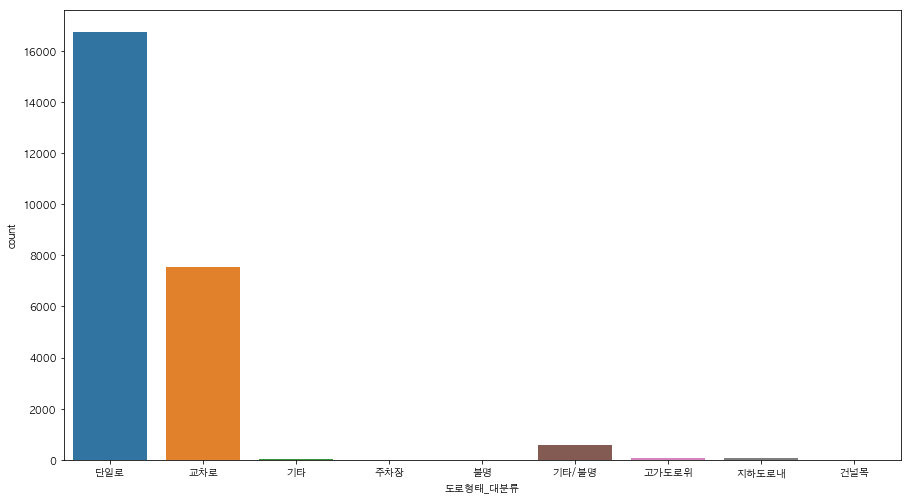

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)  
sns.countplot(data=train, x="도로형태_대분류")

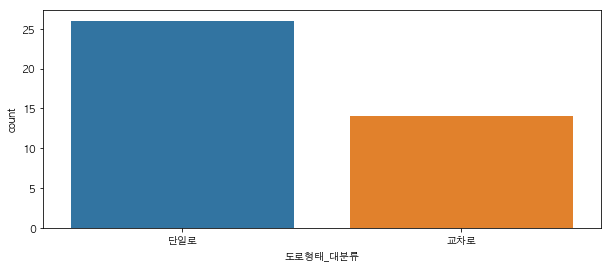

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)  
sns.countplot(data=test, x="도로형태_대분류")

In [24]:
train_단일로 = train.loc[train["도로형태_대분류"] == "단일로"]
train_교차로 = train.loc[train["도로형태_대분류"] == "교차로"]

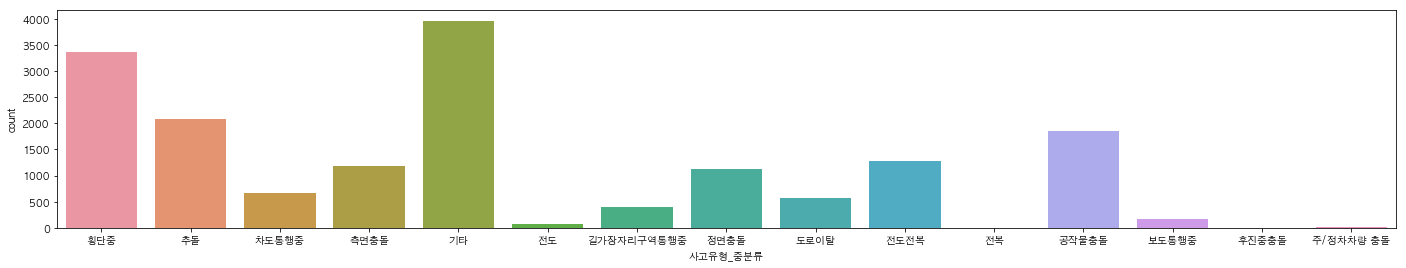

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(24, 4)
sns.countplot(data=train_단일로, x="사고유형_중분류")

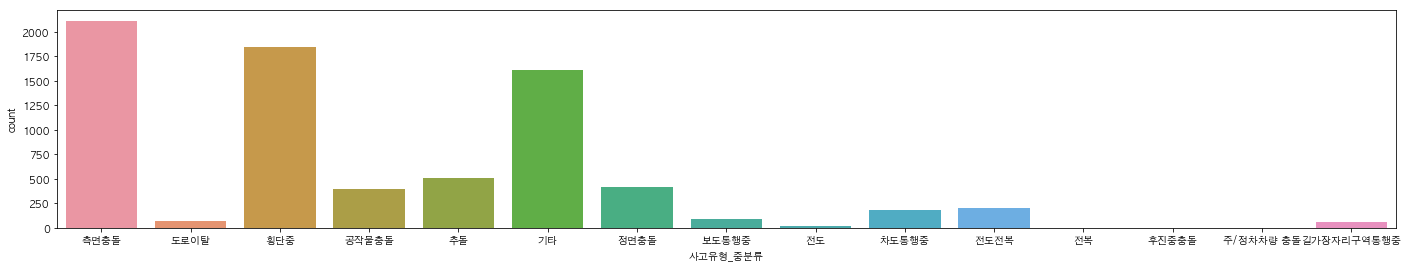

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(24, 4)
sns.countplot(data=train_교차로, x="사고유형_중분류")

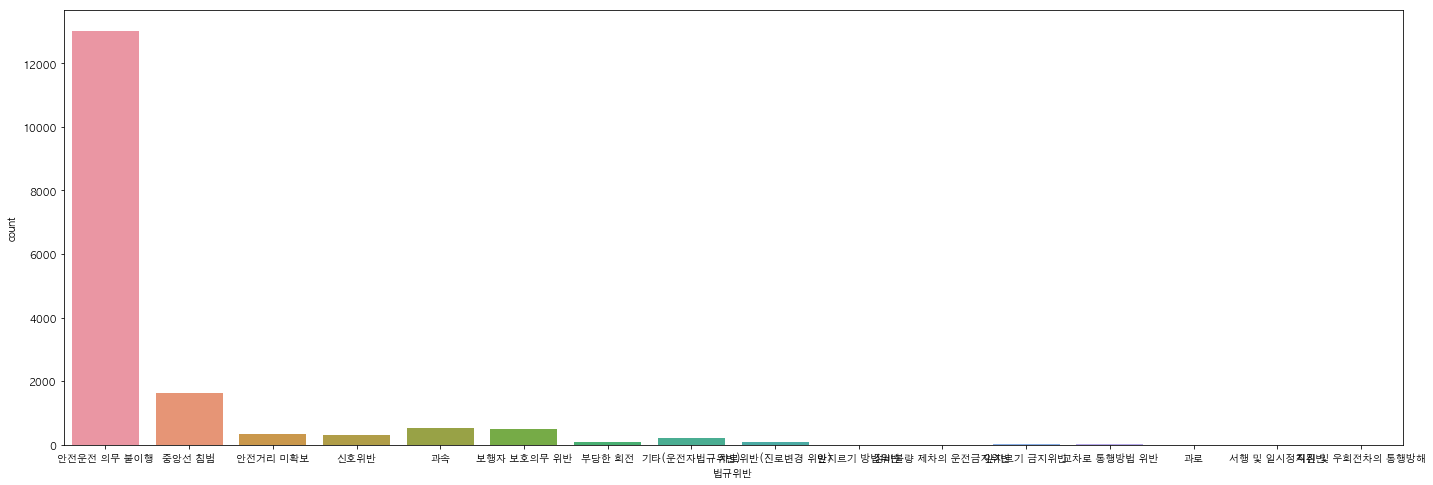

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(24, 8)
sns.countplot(data=train_단일로, x="법규위반")

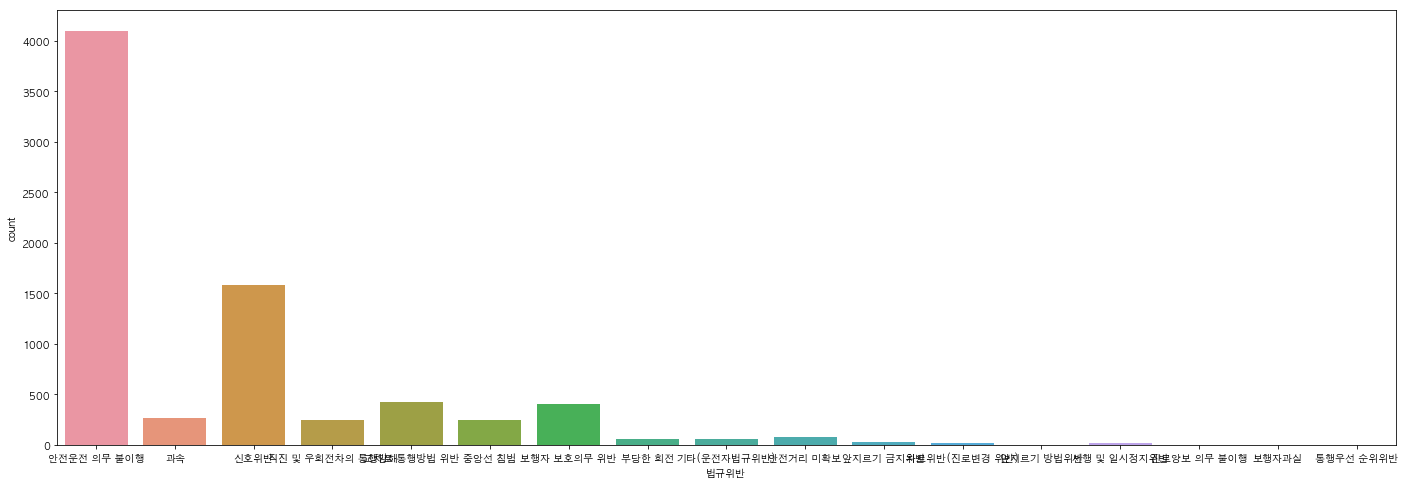

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(24, 8)
sns.countplot(data=train_교차로, x="법규위반")

In [29]:
train["사고유형_중분류_측면충돌"] = train["사고유형_중분류"] == "측면충돌"

test["사고유형_중분류_측면충돌"] = test["사고유형_중분류"] == "측면충돌"

In [30]:
train["법규위반_신호위반"] = train["법규위반"] == "신호위반"

test["법규위반_신호위반"] = test["법규위반"] == "신호위반"

In [31]:
feature_names = ["사고유형_중분류_측면충돌", "법규위반_신호위반"]
label_name = "도로형태_대분류"

In [32]:
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]

In [33]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [34]:
predictions = model.predict(X_test)
test["result_도로형태_대분류"] = predictions
test.loc[test["도로형태_대분류"].isnull(), "도로형태_대분류"] = test["result_도로형태_대분류"]

/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## fillin_도로형태

In [35]:
# feature colums : 도로형태_대분류, 법규위반

In [36]:
train["도로형태_대분류_단일로"] = train["도로형태_대분류"] == "단일로"
train["도로형태_대분류_교차로"] = train["도로형태_대분류"] == "교차로"

test["도로형태_대분류_단일로"] = test["도로형태_대분류"] == "단일로"
test["도로형태_대분류_교차로"] = test["도로형태_대분류"] == "교차로"

In [37]:
train["법규위반_보행자 보호의무 위반"] = train["법규위반"] == "보행자 보호의무 위반"

test["법규위반_보행자 보호의무 위반"] = test["법규위반"] == "보행자 보호의무 위반"

In [38]:
feature_names = ["도로형태_대분류_단일로", "도로형태_대분류_교차로", "법규위반_보행자 보호의무 위반"]
label_name = "도로형태"

In [39]:
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]

In [40]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [41]:
predictions = model.predict(X_test)
test["result_도로형태"] = predictions
test.loc[test["도로형태"].isnull(), "도로형태"] = test["result_도로형태"]

/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## fillin_당사자종별_2당_대분류

In [42]:
# feature colums : 사상자수, 사고유형_대분류, 사고유형_중분류, 법규위반

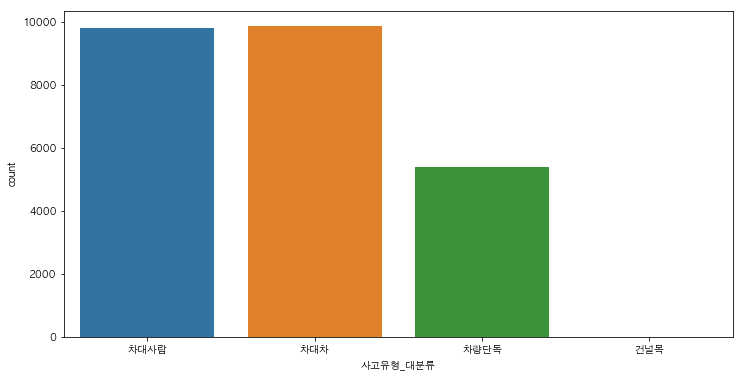

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.countplot(data=train, x="사고유형_대분류")

In [44]:
train["사고유형_대분류_차대차"] = train["사고유형_대분류"] == "차대차"
train["사고유형_대분류_차대사람"] = train["사고유형_대분류"] == "차대사람"
train["사고유형_대분류_차량단독"] = train["사고유형_대분류"] == "차량단독"

test["사고유형_대분류_차대차"] = test["사고유형_대분류"] == "차대차"
test["사고유형_대분류_차대사람"] = test["사고유형_대분류"] == "차대사람"
test["사고유형_대분류_차량단독"] = test["사고유형_대분류"] == "차량단독"

In [45]:
train["사고유형_중분류_추돌"] = train["사고유형_중분류"] == "추돌"
train["사고유형_중분류_측면충돌"] = train["사고유형_중분류"] == "측면충돌"
train["사고유형_중분류_기타"] = train["사고유형_중분류"] == "기타"
train["사고유형_중분류_공작물충돌"] = train["사고유형_중분류"] == "공작물충돌"

test["사고유형_중분류_추돌"] = test["사고유형_중분류"] == "추돌"
test["사고유형_중분류_측면충돌"] = test["사고유형_중분류"] == "측면충돌"
test["사고유형_중분류_기타"] = test["사고유형_중분류"] == "기타"
test["사고유형_중분류_공작물충돌"] = test["사고유형_중분류"] == "공작물충돌"

In [46]:
train["법규위반_안전운전 의무 불이행"] = train["법규위반"] == "안전운전 의무 불이행"
train["법규위반_신호위반"] = train["법규위반"] == "신호위반"
train["법규위반_보행자 보호의무 위반"] = train["법규위반"] == "보행자 보호의무 위반"
train["법규위반_과속"] = train["법규위반"] == "과속"

test["법규위반_안전운전 의무 불이행"] = test["법규위반"] == "안전운전 의무 불이행"
test["법규위반_신호위반"] = test["법규위반"] == "신호위반"
test["법규위반_보행자 보호의무 위반"] = test["법규위반"] == "보행자 보호의무 위반"
test["법규위반_과속"] = test["법규위반"] == "과속"

In [47]:
feature_names = ["사상자수", "사고유형_대분류_차대차", "사고유형_대분류_차대사람", "사고유형_대분류_차량단독", "사고유형_중분류_추돌", "사고유형_중분류_측면충돌", "사고유형_중분류_기타", "사고유형_중분류_공작물충돌", "법규위반_안전운전 의무 불이행", "법규위반_신호위반", "법규위반_보행자 보호의무 위반", "법규위반_과속"]
label_name = "당사자종별_2당_대분류"

In [48]:
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]

In [49]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [50]:
predictions = model.predict(X_test)
test["result_당사자종별_2당_대분류"] = predictions
test.loc[test["당사자종별_2당_대분류"].isnull(), "당사자종별_2당_대분류"] = test["result_당사자종별_2당_대분류"]

/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## fillin_당사자종별_1당_대분류

In [51]:
# feature colums : 사상자수, 사고유형_대분류, 사고유형_중분류, 법규위반, 당사자종별_2당_대분류

In [52]:
train["사고유형_대분류_차대차"] = train["사고유형_대분류"] == "차대차"
train["사고유형_대분류_차대사람"] = train["사고유형_대분류"] == "차대사람"
train["사고유형_대분류_차량단독"] = train["사고유형_대분류"] == "차량단독"

test["사고유형_대분류_차대차"] = test["사고유형_대분류"] == "차대차"
test["사고유형_대분류_차대사람"] = test["사고유형_대분류"] == "차대사람"
test["사고유형_대분류_차량단독"] = test["사고유형_대분류"] == "차량단독"

In [53]:
train["사고유형_중분류_추돌"] = train["사고유형_중분류"] == "추돌"
train["사고유형_중분류_측면충돌"] = train["사고유형_중분류"] == "측면충돌"
train["사고유형_중분류_기타"] = train["사고유형_중분류"] == "기타"
train["사고유형_중분류_공작물충돌"] = train["사고유형_중분류"] == "공작물충돌"

test["사고유형_중분류_추돌"] = test["사고유형_중분류"] == "추돌"
test["사고유형_중분류_측면충돌"] = test["사고유형_중분류"] == "측면충돌"
test["사고유형_중분류_기타"] = test["사고유형_중분류"] == "기타"
test["사고유형_중분류_공작물충돌"] = test["사고유형_중분류"] == "공작물충돌"

In [54]:
train["법규위반_안전운전 의무 불이행"] = train["법규위반"] == "안전운전 의무 불이행"
train["법규위반_신호위반"] = train["법규위반"] == "신호위반"
train["법규위반_보행자 보호의무 위반"] = train["법규위반"] == "보행자 보호의무 위반"
train["법규위반_과속"] = train["법규위반"] == "과속"
train["법규위반_부당한 회전"] = train["법규위반"] == "부당한 회전"

test["법규위반_안전운전 의무 불이행"] = test["법규위반"] == "안전운전 의무 불이행"
test["법규위반_신호위반"] = test["법규위반"] == "신호위반"
test["법규위반_보행자 보호의무 위반"] = test["법규위반"] == "보행자 보호의무 위반"
test["법규위반_과속"] = test["법규위반"] == "과속"
test["법규위반_부당한 회전"] = test["법규위반"] == "부당한 회전"

In [55]:
train["당사자종별_2당_대분류_승용차"] = train["당사자종별_2당_대분류"] == "승용차"
train["당사자종별_2당_대분류_화물차"] = train["당사자종별_2당_대분류"] == "화물차"
train["당사자종별_2당_대분류_보행자"] = train["당사자종별_2당_대분류"] == "보행자"
train["당사자종별_2당_대분류_없음"] = train["당사자종별_2당_대분류"] == "없음"

test["당사자종별_2당_대분류_승용차"] = test["당사자종별_2당_대분류"] == "승용차"
test["당사자종별_2당_대분류_화물차"] = test["당사자종별_2당_대분류"] == "화물차"
test["당사자종별_2당_대분류_보행자"] = test["당사자종별_2당_대분류"] == "보행자"
test["당사자종별_2당_대분류_없음"] = test["당사자종별_2당_대분류"] == "없음"

In [56]:
feature_names = ["사상자수", "사고유형_대분류_차대차", "사고유형_대분류_차대사람", "사고유형_대분류_차량단독", "사고유형_중분류_추돌", "사고유형_중분류_측면충돌", "사고유형_중분류_기타", "사고유형_중분류_공작물충돌", "법규위반_안전운전 의무 불이행", "법규위반_신호위반", "법규위반_보행자 보호의무 위반", "법규위반_과속", "법규위반_부당한 회전", "당사자종별_2당_대분류_승용차", "당사자종별_2당_대분류_화물차", "당사자종별_2당_대분류_보행자", "당사자종별_2당_대분류_없음"]
label_name = "당사자종별_1당_대분류"

In [57]:
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]

In [58]:
feature_names

['사상자수',
 '사고유형_대분류_차대차',
 '사고유형_대분류_차대사람',
 '사고유형_대분류_차량단독',
 '사고유형_중분류_추돌',
 '사고유형_중분류_측면충돌',
 '사고유형_중분류_기타',
 '사고유형_중분류_공작물충돌',
 '법규위반_안전운전 의무 불이행',
 '법규위반_신호위반',
 '법규위반_보행자 보호의무 위반',
 '법규위반_과속',
 '법규위반_부당한 회전',
 '당사자종별_2당_대분류_승용차',
 '당사자종별_2당_대분류_화물차',
 '당사자종별_2당_대분류_보행자',
 '당사자종별_2당_대분류_없음']

In [59]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [60]:
predictions = model.predict(X_test)
test["result_당사자종별_1당_대분류"] = predictions
test.loc[test["당사자종별_1당_대분류"].isnull(), "당사자종별_1당_대분류"] = test["result_당사자종별_1당_대분류"]

/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## fillin_법규위반

In [61]:
# feature columns : 도로형태, 당사자종별_1당_대분류, 당사자종별_2당_대분류

In [62]:
train["도로형태_교차로내"] = train["도로형태"] == "교차로내"
train["도로형태_기타단일로"] = train["도로형태"] == "기타단일로"
train["도로형태_교량위"] = train["도로형태"] == "교량위"
train["도로형태_교차로횡단보도내"] = train["도로형태"] == "교차로횡단보도내"

test["도로형태_교차로내"] = test["도로형태"] == "교차로내"
test["도로형태_기타단일로"] = test["도로형태"] == "기타단일로"
test["도로형태_교량위"] = test["도로형태"] == "교량위"
test["도로형태_교차로횡단보도내"] = test["도로형태"] == "교차로횡단보도내"

In [63]:
train["당사자종별_1당_대분류_이륜차"] = train["당사자종별_1당_대분류"] == "이륜차"
train["당사자종별_1당_대분류_원동기장치자전거"] = train["당사자종별_1당_대분류"] == "원동기장치자전거"
train["당사자종별_1당_대분류_승용차"] = train["당사자종별_1당_대분류"] == "승용차"
train["당사자종별_1당_대분류_화물차"] = train["당사자종별_1당_대분류"] == "화물차"
train["당사자종별_1당_대분류_승합차"] = train["당사자종별_1당_대분류"] == "승합차"
train["당사자종별_1당_대분류_특수차"] = train["당사자종별_1당_대분류"] == "특수차"

test["당사자종별_1당_대분류_이륜차"] = test["당사자종별_1당_대분류"] == "이륜차"
test["당사자종별_1당_대분류_원동기장치자전거"] = test["당사자종별_1당_대분류"] == "원동기장치자전거"
test["당사자종별_1당_대분류_승용차"] = test["당사자종별_1당_대분류"] == "승용차"
test["당사자종별_1당_대분류_화물차"] = test["당사자종별_1당_대분류"] == "화물차"
test["당사자종별_1당_대분류_승합차"] = test["당사자종별_1당_대분류"] == "승합차"
test["당사자종별_1당_대분류_특수차"] = test["당사자종별_1당_대분류"] == "특수차"

In [64]:
train["당사자종별_2당_대분류_승용차"] = train["당사자종별_2당_대분류"] == "승용차"
train["당사자종별_2당_대분류_화물차"] = train["당사자종별_2당_대분류"] == "화물차"
train["당사자종별_2당_대분류_승합차"] = train["당사자종별_2당_대분류"] == "승합차"
train["당사자종별_2당_대분류_보행자"] = train["당사자종별_2당_대분류"] == "보행자"
train["당사자종별_2당_대분류_없음"] = train["당사자종별_2당_대분류"] == "없음"

test["당사자종별_2당_대분류_승용차"] = test["당사자종별_2당_대분류"] == "승용차"
test["당사자종별_2당_대분류_화물차"] = test["당사자종별_2당_대분류"] == "화물차"
test["당사자종별_2당_대분류_승합차"] = test["당사자종별_2당_대분류"] == "승합차"
test["당사자종별_2당_대분류_보행자"] = test["당사자종별_2당_대분류"] == "보행자"
test["당사자종별_2당_대분류_없음"] = test["당사자종별_2당_대분류"] == "없음"

In [65]:
feature_names = ["도로형태_교차로내", "도로형태_기타단일로", "도로형태_교량위", "도로형태_교차로횡단보도내", "당사자종별_1당_대분류_이륜차", "당사자종별_1당_대분류_원동기장치자전거", "당사자종별_1당_대분류_승용차", "당사자종별_1당_대분류_화물차",  "당사자종별_1당_대분류_승합차", "당사자종별_1당_대분류_특수차", "당사자종별_2당_대분류_보행자", "당사자종별_2당_대분류_없음", "당사자종별_2당_대분류_승용차", "당사자종별_2당_대분류_화물차", "당사자종별_2당_대분류_승합차"]
label_name = "법규위반"

In [66]:
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]

In [67]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [68]:
predictions = model.predict(X_test)
test["result_법규위반"] = predictions
test.loc[test["법규위반"].isnull(), "법규위반"] = test["result_법규위반"]

/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## fillin_사고유형_중분류

In [69]:
# feature columns : 도로형태, 당사자종별_1당_대분류, 당사자종별_2당_대분류

In [70]:
train["도로형태_교차로내"] = train["도로형태"] == "교차로내"
train["도로형태_기타단일로"] = train["도로형태"] == "기타단일로"
train["도로형태_교량위"] = train["도로형태"] == "교량위"
train["도로형태_교차로횡단보도내"] = train["도로형태"] == "교차로횡단보도내"

test["도로형태_교차로내"] = test["도로형태"] == "교차로내"
test["도로형태_기타단일로"] = test["도로형태"] == "기타단일로"
test["도로형태_교량위"] = test["도로형태"] == "교량위"
test["도로형태_교차로횡단보도내"] = test["도로형태"] == "교차로횡단보도내"

In [71]:
train["당사자종별_1당_대분류_이륜차"] = train["당사자종별_1당_대분류"] == "이륜차"
train["당사자종별_1당_대분류_원동기장치자전거"] = train["당사자종별_1당_대분류"] == "원동기장치자전거"
train["당사자종별_1당_대분류_승용차"] = train["당사자종별_1당_대분류"] == "승용차"
train["당사자종별_1당_대분류_화물차"] = train["당사자종별_1당_대분류"] == "화물차"
train["당사자종별_1당_대분류_승합차"] = train["당사자종별_1당_대분류"] == "승합차"
train["당사자종별_1당_대분류_특수차"] = train["당사자종별_1당_대분류"] == "특수차"

test["당사자종별_1당_대분류_이륜차"] = test["당사자종별_1당_대분류"] == "이륜차"
test["당사자종별_1당_대분류_원동기장치자전거"] = test["당사자종별_1당_대분류"] == "원동기장치자전거"
test["당사자종별_1당_대분류_승용차"] = test["당사자종별_1당_대분류"] == "승용차"
test["당사자종별_1당_대분류_화물차"] = test["당사자종별_1당_대분류"] == "화물차"
test["당사자종별_1당_대분류_승합차"] = test["당사자종별_1당_대분류"] == "승합차"
test["당사자종별_1당_대분류_특수차"] = test["당사자종별_1당_대분류"] == "특수차"

In [72]:
train["당사자종별_2당_대분류_승용차"] = train["당사자종별_2당_대분류"] == "승용차"
train["당사자종별_2당_대분류_화물차"] = train["당사자종별_2당_대분류"] == "화물차"
train["당사자종별_2당_대분류_승합차"] = train["당사자종별_2당_대분류"] == "승합차"
train["당사자종별_2당_대분류_보행자"] = train["당사자종별_2당_대분류"] == "보행자"
train["당사자종별_2당_대분류_없음"] = train["당사자종별_2당_대분류"] == "없음"

test["당사자종별_2당_대분류_승용차"] = test["당사자종별_2당_대분류"] == "승용차"
test["당사자종별_2당_대분류_화물차"] = test["당사자종별_2당_대분류"] == "화물차"
test["당사자종별_2당_대분류_승합차"] = test["당사자종별_2당_대분류"] == "승합차"
test["당사자종별_2당_대분류_보행자"] = test["당사자종별_2당_대분류"] == "보행자"
test["당사자종별_2당_대분류_없음"] = test["당사자종별_2당_대분류"] == "없음"

In [73]:
feature_names = ["도로형태_교차로내", "도로형태_기타단일로", "도로형태_교량위", "도로형태_교차로횡단보도내", "당사자종별_2당_대분류_보행자", "당사자종별_2당_대분류_없음", "당사자종별_2당_대분류_승용차", "당사자종별_2당_대분류_화물차", "당사자종별_2당_대분류_승합차"]
label_name = "사고유형_중분류"

In [74]:
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]

In [75]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [76]:
predictions = model.predict(X_test)
test["result_사고유형_중분류"] = predictions
test.loc[test["사고유형_중분류"].isnull(), "사고유형_중분류"] = test["result_사고유형_중분류"]
test.loc[test["사고유형_중분류"] == "측면직각충돌", "사고유형_중분류"] = "측면충돌"

/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## fillin_주야

In [77]:
# feature columns : 요일, 도로형태, 법규위반, 사고유형_중분류, 당사자종별_1당_대분류, 당사자종별_2당_대분류

In [78]:
train["요일_화"] = train["요일"] == "화"
train["요일_목"] = train["요일"] == "목"
train["요일_일"] = train["요일"] == "일"

test["요일_화"] = test["요일"] == "화"
test["요일_목"] = test["요일"] == "목"
test["요일_일"] = test["요일"] == "일"

In [79]:
train["도로형태_교차로내"] = train["도로형태"] == "교차로내"
train["도로형태_기타단일로"] = train["도로형태"] == "기타단일로"

test["도로형태_교차로내"] = test["도로형태"] == "교차로내"
test["도로형태_기타단일로"] = test["도로형태"] == "기타단일로"

In [80]:
train["법규위반_안전운전 의무 불이행"] = train["법규위반"] == "안전운전 의무 불이행"
train["법규위반_신호위반"] = train["법규위반"] == "신호위반"
train["법규위반_부당한 회전"] = train["법규위반"] == "부당한 회전"

test["법규위반_안전운전 의무 불이행"] = test["법규위반"] == "안전운전 의무 불이행"
test["법규위반_신호위반"] = test["법규위반"] == "신호위반"
test["법규위반_부당한 회전"] = test["법규위반"] == "부당한 회전"

In [81]:
train["사고유형_중분류_추돌"] = train["사고유형_중분류"] == "추돌"
train["사고유형_중분류_측면충돌"] = train["사고유형_중분류"] == "측면충돌"
train["사고유형_중분류_기타"] = train["사고유형_중분류"] == "기타"

test["사고유형_중분류_추돌"] = test["사고유형_중분류"] == "추돌"
test["사고유형_중분류_측면충돌"] = test["사고유형_중분류"] == "측면충돌"
test["사고유형_중분류_기타"] = test["사고유형_중분류"] == "기타"

In [82]:
train["당사자종별_1당_대분류_이륜차"] = train["당사자종별_1당_대분류"] == "이륜차"
train["당사자종별_1당_대분류_자전거"] = train["당사자종별_1당_대분류"] == "자전거"
train["당사자종별_1당_대분류_승용차"] = train["당사자종별_1당_대분류"] == "승용차"
train["당사자종별_1당_대분류_승합차"] = train["당사자종별_1당_대분류"] == "승합차"

test["당사자종별_1당_대분류_이륜차"] = test["당사자종별_1당_대분류"] == "이륜차"
test["당사자종별_1당_대분류_자전거"] = test["당사자종별_1당_대분류"] == "자전거"
test["당사자종별_1당_대분류_승용차"] = test["당사자종별_1당_대분류"] == "승용차"
test["당사자종별_1당_대분류_승합차"] = test["당사자종별_1당_대분류"] == "승합차"

In [83]:
train["당사자종별_2당_대분류_승용차"] = train["당사자종별_2당_대분류"] == "승용차"
train["당사자종별_2당_대분류_보행자"] = train["당사자종별_2당_대분류"] == "보행자"
train["당사자종별_2당_대분류_원동기장치자전거"] = train["당사자종별_2당_대분류"] == "원동기장치자전거"

test["당사자종별_2당_대분류_승용차"] = test["당사자종별_2당_대분류"] == "승용차"
test["당사자종별_2당_대분류_보행자"] = test["당사자종별_2당_대분류"] == "보행자"
test["당사자종별_2당_대분류_원동기장치자전거"] = test["당사자종별_2당_대분류"] == "원동기장치자전거"

In [84]:
feature_names = ["요일_화","요일_목", "요일_일", "도로형태_교차로내", "도로형태_기타단일로", "법규위반_안전운전 의무 불이행", "법규위반_신호위반", "법규위반_부당한 회전", "사고유형_중분류_추돌", "사고유형_중분류_측면충돌", "사고유형_중분류_기타", "당사자종별_1당_대분류_이륜차", "당사자종별_1당_대분류_자전거", "당사자종별_1당_대분류_승용차", "당사자종별_1당_대분류_승합차", "당사자종별_2당_대분류_보행자", "당사자종별_2당_대분류_승용차", "당사자종별_2당_대분류_원동기장치자전거"]
label_name = "주야"

In [85]:
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]

In [86]:
model = RandomForestClassifier(random_state=7)

In [87]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

In [88]:
predictions = model.predict(X_test)
test["result_주야"] = predictions
test.loc[test["주야"].isnull(), "주야"] = test["result_주야"]

## fillin_요일

In [89]:
# feature columns : 주야, 도로형태_대분류, 도로형태, 법규위반, 사고유형_대분류, 사고유형_중분류, 당사자종별_1당_대분류, 당사자종별_2당_대분류

In [90]:
train["주야_주간"] = train["주야"] == "주간"
train["주야_야간"] = train["주야"] == "야간"

test["주야_주간"] = test["주야"] == "주간"
test["주야_야간"] = test["주야"] == "야간"

In [91]:
train["도로형태_교차로내"] = train["도로형태"] == "교차로내"
train["도로형태_기타단일로"] = train["도로형태"] == "기타단일로"

test["도로형태_교차로내"] = test["도로형태"] == "교차로내"
test["도로형태_기타단일로"] = test["도로형태"] == "기타단일로"

In [92]:
train["법규위반_안전운전 의무 불이행"] = train["법규위반"] == "안전운전 의무 불이행"
train["법규위반_신호위반"] = train["법규위반"] == "신호위반"

test["법규위반_안전운전 의무 불이행"] = test["법규위반"] == "안전운전 의무 불이행"
test["법규위반_신호위반"] = test["법규위반"] == "신호위반"

In [93]:
train["사고유형_대분류_차대차"] = train["사고유형_대분류"] == "차대차"
train["사고유형_대분류_차대사람"] = train["사고유형_대분류"] == "차대사람"
train["사고유형_대분류_차량단독"] = train["사고유형_대분류"] == "차량단독"

test["사고유형_대분류_차대차"] = test["사고유형_대분류"] == "차대차"
test["사고유형_대분류_차대사람"] = test["사고유형_대분류"] == "차대사람"
test["사고유형_대분류_차량단독"] = test["사고유형_대분류"] == "차량단독"

In [94]:
train["사고유형_중분류_정면충돌"] = train["사고유형_중분류"] == "정면충돌"
train["사고유형_중분류_측면충돌"] = train["사고유형_중분류"] == "측면충돌"
train["사고유형_중분류_공작물충돌"] = train["사고유형_중분류"] == "공작물충돌"
train["사고유형_중분류_길가장자리구역통행중"] = train["사고유형_중분류"] == "길가장자리구역통행중"

test["사고유형_중분류_정면충돌"] = test["사고유형_중분류"] == "정면충돌"
test["사고유형_중분류_측면충돌"] = test["사고유형_중분류"] == "측면충돌"
test["사고유형_중분류_공작물충돌"] = test["사고유형_중분류"] == "공작물충돌"
test["사고유형_중분류_길가장자리구역통행중"] = test["사고유형_중분류"] == "길가장자리구역통행중"

In [95]:
train["당사자종별_1당_대분류_승용차"] = train["당사자종별_1당_대분류"] == "승용차"
train["당사자종별_1당_대분류_승합차"] = train["당사자종별_1당_대분류"] == "승합차"
train["당사자종별_1당_대분류_화물차"] = train["당사자종별_1당_대분류"] == "화물차"
train["당사자종별_1당_대분류_특수차"] = train["당사자종별_1당_대분류"] == "특수차"

test["당사자종별_1당_대분류_승용차"] = test["당사자종별_1당_대분류"] == "승용차"
test["당사자종별_1당_대분류_승합차"] = test["당사자종별_1당_대분류"] == "승합차"
test["당사자종별_1당_대분류_화물차"] = test["당사자종별_1당_대분류"] == "화물차"
test["당사자종별_1당_대분류_특수차"] = test["당사자종별_1당_대분류"] == "특수차"

In [96]:
train["당사자종별_2당_대분류_승용차"] = train["당사자종별_2당_대분류"] == "승용차"
train["당사자종별_2당_대분류_보행자"] = train["당사자종별_2당_대분류"] == "보행자"
train["당사자종별_2당_대분류_원동기장치자전거"] = train["당사자종별_2당_대분류"] == "원동기장치자전거"
train["당사자종별_2당_대분류_이륜차"] = train["당사자종별_2당_대분류"] == "이륜차"
train["당사자종별_2당_대분류_없음"] = train["당사자종별_2당_대분류"] == "없음"

test["당사자종별_2당_대분류_승용차"] = test["당사자종별_2당_대분류"] == "승용차"
test["당사자종별_2당_대분류_보행자"] = test["당사자종별_2당_대분류"] == "보행자"
test["당사자종별_2당_대분류_원동기장치자전거"] = test["당사자종별_2당_대분류"] == "원동기장치자전거"
test["당사자종별_2당_대분류_이륜차"] = test["당사자종별_2당_대분류"] == "이륜차"
test["당사자종별_2당_대분류_없음"] = test["당사자종별_2당_대분류"] == "없음"

In [97]:
feature_names = ["주야_주간", "주야_야간", "도로형태_교차로내", "도로형태_기타단일로", "법규위반_안전운전 의무 불이행", "법규위반_신호위반", "당사자종별_1당_대분류_승용차", "당사자종별_1당_대분류_승합차", "당사자종별_1당_대분류_화물차", "당사자종별_1당_대분류_특수차", "당사자종별_2당_대분류_승용차", "당사자종별_2당_대분류_보행자", "당사자종별_2당_대분류_원동기장치자전거", "당사자종별_2당_대분류_이륜차", "당사자종별_2당_대분류_없음", "사고유형_대분류_차대차", "사고유형_대분류_차대사람", "사고유형_대분류_차량단독"]
label_name = "요일"

In [98]:
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]

In [99]:
model = RandomForestClassifier(random_state=12)

In [100]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [101]:
predictions = model.predict(X_test)
test["result_요일"] = predictions
test.loc[test["요일"].isnull(), "요일"] = test["result_요일"]

## fillin_발생지시도

In [102]:
# feature columns : 요일, 주야, 도로형태_대분류, 도로형태, 법규위반, 사고유형_대분류, 사고유형_중분류, 당사자종별_1당_대분류, 당사자종별_2당_대분류

In [103]:
train["요일_월"] = train["요일"] == "월"
train["요일_수"] = train["요일"] == "수"

test["요일_월"] = test["요일"] == "월"
test["요일_수"] = test["요일"] == "수"

In [104]:
train["주야_주간"] = train["주야"] == "주간"
train["주야_야간"] = train["주야"] == "야간"

test["주야_주간"] = test["주야"] == "주간"
test["주야_야간"] = test["주야"] == "야간"

In [105]:
train["도로형태_대분류_단일로"] = train["도로형태_대분류"] == "단일로"
train["도로형태_대분류_교차로"] = train["도로형태_대분류"] == "교차로"

test["도로형태_대분류_단일로"] = test["도로형태_대분류"] == "단일로"
test["도로형태_대분류_교차로"] = test["도로형태_대분류"] == "교차로"

In [106]:
train["도로형태_교차로내"] = train["도로형태"] == "교차로내"
train["도로형태_교차로부근"] = train["도로형태"] == "교차로부근"
train["도로형태_기타단일로"] = train["도로형태"] == "기타단일로"

test["도로형태_교차로내"] = test["도로형태"] == "교차로내"
test["도로형태_교차로부근"] = test["도로형태"] == "교차로부근"
test["도로형태_기타단일로"] = test["도로형태"] == "기타단일로"

In [107]:
train["법규위반_안전운전 의무 불이행"] = train["법규위반"] == "안전운전 의무 불이행"
train["법규위반_중앙선침범"] = train["법규위반"] == "중앙선침범"

test["법규위반_안전운전 의무 불이행"] = test["법규위반"] == "안전운전 의무 불이행"
test["법규위반_중앙선침범"] = test["법규위반"] == "중앙선침범"

In [108]:
train["사고유형_대분류_차대차"] = train["사고유형_대분류"] == "차대차"
train["사고유형_대분류_차대사람"] = train["사고유형_대분류"] == "차대사람"
train["사고유형_대분류_차량단독"] = train["사고유형_대분류"] == "차량단독"

test["사고유형_대분류_차대차"] = test["사고유형_대분류"] == "차대차"
test["사고유형_대분류_차대사람"] = test["사고유형_대분류"] == "차대사람"
test["사고유형_대분류_차량단독"] = test["사고유형_대분류"] == "차량단독"

In [109]:
train["사고유형_중분류_정면충돌"] = train["사고유형_중분류"] == "정면충돌"
train["사고유형_중분류_추돌"] = train["사고유형_중분류"] == "추돌"
train["사고유형_중분류_공작물충돌"] = train["사고유형_중분류"] == "공작물충돌"
train["사고유형_중분류_기타"] = train["사고유형_중분류"] == "기타"

test["사고유형_중분류_정면충돌"] = test["사고유형_중분류"] == "정면충돌"
test["사고유형_중분류_추돌"] = test["사고유형_중분류"] == "추돌"
test["사고유형_중분류_공작물충돌"] = test["사고유형_중분류"] == "공작물충돌"
test["사고유형_중분류_기타"] = test["사고유형_중분류"] == "기타"

In [110]:
train["당사자종별_1당_대분류_승용차"] = train["당사자종별_1당_대분류"] == "승용차"
train["당사자종별_1당_대분류_승합차"] = train["당사자종별_1당_대분류"] == "승합차"

test["당사자종별_1당_대분류_승용차"] = test["당사자종별_1당_대분류"] == "승용차"
test["당사자종별_1당_대분류_승합차"] = test["당사자종별_1당_대분류"] == "승합차"

In [111]:
train["당사자종별_2당_대분류_승용차"] = train["당사자종별_2당_대분류"] == "승용차"
train["당사자종별_2당_대분류_보행자"] = train["당사자종별_2당_대분류"] == "보행자"
train["당사자종별_2당_대분류_화물차"] = train["당사자종별_2당_대분류"] == "화물차"
train["당사자종별_2당_대분류_없음"] = train["당사자종별_2당_대분류"] == "없음"

test["당사자종별_2당_대분류_승용차"] = test["당사자종별_2당_대분류"] == "승용차"
test["당사자종별_2당_대분류_보행자"] = test["당사자종별_2당_대분류"] == "보행자"
test["당사자종별_2당_대분류_화물차"] = test["당사자종별_2당_대분류"] == "화물차"
test["당사자종별_2당_대분류_없음"] = test["당사자종별_2당_대분류"] == "없음"

In [112]:
feature_names = ["요일_월", "요일_수", "주야_주간", "주야_야간", "도로형태_대분류_단일로", "도로형태_대분류_교차로", "도로형태_교차로내", "도로형태_교차로부근", "도로형태_기타단일로", "법규위반_안전운전 의무 불이행", "법규위반_중앙선침범", "사고유형_중분류_정면충돌", "사고유형_중분류_추돌", "사고유형_중분류_공작물충돌", "사고유형_중분류_기타", "당사자종별_1당_대분류_승용차", "당사자종별_1당_대분류_승합차", "당사자종별_2당_대분류_승용차", "당사자종별_2당_대분류_보행자", "당사자종별_2당_대분류_화물차", "당사자종별_2당_대분류_없음", "사고유형_대분류_차대차", "사고유형_대분류_차대사람", "사고유형_대분류_차량단독"]
label_name = "발생지시도"

In [113]:
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]

In [114]:
model = RandomForestClassifier(random_state=7)

In [115]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

In [116]:
predictions = model.predict(X_test)
test["result_발생지시도"] = predictions
test.loc[test["발생지시도"].isnull(), "발생지시도"] = test["result_발생지시도"]

## fillin_발생지시군구

In [117]:
# feature columns : 주야, 요일, 사고유형_대분류, 사고유형_중분류, 당사자종별_1딩_대분류, 당사자종별_2당_대분류, 법규위반, 도로형태, 발생지시도

In [118]:
train["주야_주간"] = train["주야"] == "주간"
train["주야_야간"] = train["주야"] == "야간"

test["주야_주간"] = test["주야"] == "주간"
test["주야_야간"] = test["주야"] == "야간"

In [119]:
train["요일_월"] = train["요일"] == "월"
train["요일_수"] = train["요일"] == "수"
train["요일_일"] = train["요일"] == "일"

test["요일_월"] = test["요일"] == "월"
test["요일_수"] = test["요일"] == "수"
test["요일_일"] = test["요일"] == "일"

In [120]:
train["사고유형_대분류_차대차"] = train["사고유형_대분류"] == "차대차"
train["사고유형_대분류_차대사람"] = train["사고유형_대분류"] == "차대사람"
train["사고유형_대분류_차량단독"] = train["사고유형_대분류"] == "차량단독"

test["사고유형_대분류_차대차"] = test["사고유형_대분류"] == "차대차"
test["사고유형_대분류_차대사람"] = test["사고유형_대분류"] == "차대사람"
test["사고유형_대분류_차량단독"] = test["사고유형_대분류"] == "차량단독"

In [121]:
train["사고유형_중분류_정면충돌"] = train["사고유형_중분류"] == "정면충돌"
train["사고유형_중분류_추돌"] = train["사고유형_중분류"] == "추돌"
train["사고유형_중분류_공작물충돌"] = train["사고유형_중분류"] == "공작물충돌"
train["사고유형_중분류_기타"] = train["사고유형_중분류"] == "기타"
train["사고유형_중분류_측면충돌"] = train["사고유형_중분류"] == "측면충돌"

test["사고유형_중분류_정면충돌"] = test["사고유형_중분류"] == "정면충돌"
test["사고유형_중분류_추돌"] = test["사고유형_중분류"] == "추돌"
test["사고유형_중분류_공작물충돌"] = test["사고유형_중분류"] == "공작물충돌"
test["사고유형_중분류_기타"] = test["사고유형_중분류"] == "기타"
test["사고유형_중분류_측면충돌"] = test["사고유형_중분류"] == "측면충돌"

In [122]:
train["당사자종별_1당_대분류_승용차"] = train["당사자종별_1당_대분류"] == "승용차"
train["당사자종별_1당_대분류_승합차"] = train["당사자종별_1당_대분류"] == "승합차"
train["당사자종별_1당_대분류_자전거"] = train["당사자종별_1당_대분류"] == "자전거"
train["당사자종별_1당_대분류_화물차"] = train["당사자종별_1당_대분류"] == "화물차"

test["당사자종별_1당_대분류_승용차"] = test["당사자종별_1당_대분류"] == "승용차"
test["당사자종별_1당_대분류_승합차"] = test["당사자종별_1당_대분류"] == "승합차"
test["당사자종별_1당_대분류_자전거"] = test["당사자종별_1당_대분류"] == "자전거"
test["당사자종별_1당_대분류_화물차"] = test["당사자종별_1당_대분류"] == "화물차"

In [123]:
train["당사자종별_2당_대분류_승용차"] = train["당사자종별_2당_대분류"] == "승용차"
train["당사자종별_2당_대분류_보행자"] = train["당사자종별_2당_대분류"] == "보행자"
train["당사자종별_2당_대분류_화물차"] = train["당사자종별_2당_대분류"] == "화물차"
train["당사자종별_2당_대분류_없음"] = train["당사자종별_2당_대분류"] == "없음"

test["당사자종별_2당_대분류_승용차"] = test["당사자종별_2당_대분류"] == "승용차"
test["당사자종별_2당_대분류_보행자"] = test["당사자종별_2당_대분류"] == "보행자"
test["당사자종별_2당_대분류_화물차"] = test["당사자종별_2당_대분류"] == "화물차"
test["당사자종별_2당_대분류_없음"] = test["당사자종별_2당_대분류"] == "없음"

In [124]:
train["법규위반_안전운전 의무 불이행"] = train["법규위반"] == "안전운전 의무 불이행"
train["법규위반_중앙선침범"] = train["법규위반"] == "중앙선침범"

test["법규위반_안전운전 의무 불이행"] = test["법규위반"] == "안전운전 의무 불이행"
test["법규위반_중앙선침범"] = test["법규위반"] == "중앙선침범"

In [125]:
train["도로형태_교차로내"] = train["도로형태"] == "교차로내"
train["도로형태_교차로부근"] = train["도로형태"] == "교차로부근"
train["도로형태_기타단일로"] = train["도로형태"] == "기타단일로"

test["도로형태_교차로내"] = test["도로형태"] == "교차로내"
test["도로형태_교차로부근"] = test["도로형태"] == "교차로부근"
test["도로형태_기타단일로"] = test["도로형태"] == "기타단일로"

In [126]:
train["발생지시도_인천"] = train["발생지시도"] == "인천"
train["발생지시도_전북"] = train["발생지시도"] == "전북"
train["발생지시도_대구"] = train["발생지시도"] == "대구"
train["발생지시도_광주"] = train["발생지시도"] == "광주"
train["발생지시도_서울"] = train["발생지시도"] == "서울"
train["발생지시도_경기"] = train["발생지시도"] == "경기"

test["발생지시도_인천"] = test["발생지시도"] == "인천"
test["발생지시도_전북"] = test["발생지시도"] == "전북"
test["발생지시도_대구"] = test["발생지시도"] == "대구"
test["발생지시도_광주"] = test["발생지시도"] == "광주"
test["발생지시도_서울"] = test["발생지시도"] == "서울"
test["발생지시도_경기"] = test["발생지시도"] == "경기"

In [127]:
feature_names = ["요일_월", "요일_수", "요일_일", "사고유형_대분류_차대차", "사고유형_대분류_차대사람", "사고유형_대분류_차량단독", "사고유형_중분류_정면충돌", "사고유형_중분류_추돌", "사고유형_중분류_공작물충돌", "사고유형_중분류_기타", "사고유형_중분류_측면충돌", "법규위반_안전운전 의무 불이행", "법규위반_중앙선침범", "도로형태_교차로내", "도로형태_교차로부근", "도로형태_기타단일로", "발생지시도_인천", "발생지시도_전북", "발생지시도_대구", "발생지시도_광주", "발생지시도_서울", "발생지시도_경기", "당사자종별_1당_대분류_승용차", "당사자종별_1당_대분류_승합차", "당사자종별_1당_대분류_자전거", "당사자종별_1당_대분류_화물차", "당사자종별_2당_대분류_승용차", "당사자종별_2당_대분류_보행자", "당사자종별_2당_대분류_화물차", "당사자종별_2당_대분류_없음"]
label_name = "발생지시군구"

In [128]:
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]

In [129]:
model = RandomForestClassifier(random_state=7)

In [130]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

In [131]:
predictions = model.predict(X_test)
test["result_발생지시군구"] = predictions
test.loc[test["발생지시군구"].isnull(), "발생지시군구"] = test["result_발생지시군구"]

## fillin_사망자수

In [132]:
# feature columns : 주야, 요일, 사고유형_대분류, 사고유형_중분류, 법규위반, 도로형태, 당사자종별_1당_대분류, 당사자종별_2당_대분류

In [133]:
train_주간 = train.loc[train["주야"] == "주간"]
train_야간 = train.loc[train["주야"] == "야간"]

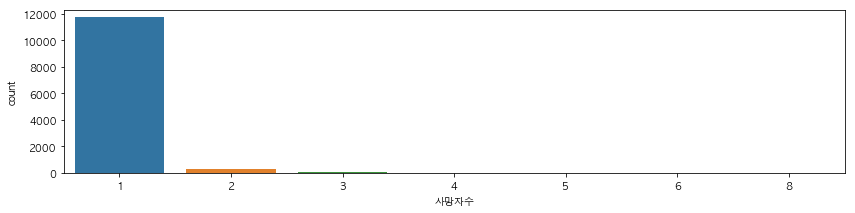

In [134]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 3)
sns.countplot(data=train_주간, x="사망자수")

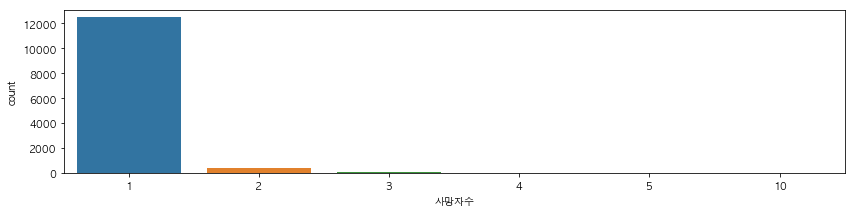

In [135]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 3)
sns.countplot(data=train_야간, x="사망자수")

In [136]:
train["주야_주간"] = train["주야"] == "주간"
train["주야_야간"] = train["주야"] == "야간"

test["주야_주간"] = test["주야"] == "주간"
test["주야_야간"] = test["주야"] == "야간"

In [137]:
train["요일_월"] = train["요일"] == "월"
train["요일_화"] = train["요일"] == "화"
train["요일_수"] = train["요일"] == "수"
train["요일_목"] = train["요일"] == "목"
train["요일_금"] = train["요일"] == "금"
train["요일_토"] = train["요일"] == "토"
train["요일_일"] = train["요일"] == "일"

test["요일_월"] = test["요일"] == "월"
test["요일_화"] = test["요일"] == "화"
test["요일_수"] = test["요일"] == "수"
test["요일_목"] = test["요일"] == "목"
test["요일_금"] = test["요일"] == "금"
test["요일_토"] = test["요일"] == "토"
test["요일_일"] = test["요일"] == "일"

In [138]:
train["사고유형_대분류_차대차"] = train["사고유형_대분류"] == "차대차"
train["사고유형_대분류_차대사람"] = train["사고유형_대분류"] == "차대사람"
train["사고유형_대분류_차량단독"] = train["사고유형_대분류"] == "차량단독"

test["사고유형_대분류_차대차"] = test["사고유형_대분류"] == "차대차"
test["사고유형_대분류_차대사람"] = test["사고유형_대분류"] == "차대사람"
test["사고유형_대분류_차량단독"] = test["사고유형_대분류"] == "차량단독"

In [139]:
train["사고유형_중분류_측면충돌"] = train["사고유형_중분류"] == "측면충돌"
train["사고유형_중분류_차도통행중"] = train["사고유형_중분류"] == "차도통행중"
train["사고유형_중분류_추돌"] = train["사고유형_중분류"] == "추돌"
train["사고유형_중분류_횡단중"] = train["사고유형_중분류"] == "횡단중"
train["사고유형_중분류_기타"] = train["사고유형_중분류"] == "기타"

test["사고유형_중분류_측면충돌"] = test["사고유형_중분류"] == "측면충돌"
test["사고유형_중분류_차도통행중"] = test["사고유형_중분류"] == "차도통행중"
test["사고유형_중분류_추돌"] = test["사고유형_중분류"] == "추돌"
test["사고유형_중분류_횡단중"] = test["사고유형_중분류"] == "횡단중"
test["사고유형_중분류_기타"] = test["사고유형_중분류"] == "기타"

In [140]:
train["법규위반_안전운전 의무 불이행"] = train["법규위반"] == "안전운전 의무 불이행"
train["법규위반_중앙선침범"] = train["법규위반"] == "중앙선침범"
train["법규위반_과속"] = train["법규위반"] == "과속"
train["법규위반_기타(운전자법규위반)"] = train["법규위반"] == "기타(운전자법규위반)"
train["법규위반_부당한회전"] = train["법규위반"] == "부당한회전"
train["법규위반_신호위반"] = train["법규위반"] == "신호위반"

test["법규위반_안전운전 의무 불이행"] = test["법규위반"] == "안전운전 의무 불이행"
test["법규위반_중앙선침범"] = test["법규위반"] == "중앙선침범"
test["법규위반_과속"] = test["법규위반"] == "과속"
test["법규위반_기타(운전자법규위반)"] = test["법규위반"] == "기타(운전자법규위반)"
test["법규위반_부당한회전"] = test["법규위반"] == "부당한회전"
test["법규위반_신호위반"] = test["법규위반"] == "신호위반"

In [141]:
train["도로형태_교차로내"] = train["도로형태"] == "교차로내"
train["도로형태_기타단일로"] = train["도로형태"] == "기타단일로"

test["도로형태_교차로내"] = test["도로형태"] == "교차로내"
test["도로형태_기타단일로"] = test["도로형태"] == "기타단일로"

In [142]:
train["당사자종별_1당_대분류_승용차"] = train["당사자종별_1당_대분류"] == "승용차"
train["당사자종별_1당_대분류_건설기계"] = train["당사자종별_1당_대분류"] == "건설기계"
train["당사자종별_1당_대분류_자전거"] = train["당사자종별_1당_대분류"] == "자전거"
train["당사자종별_1당_대분류_화물차"] = train["당사자종별_1당_대분류"] == "화물차"
train["당사자종별_1당_대분류_이륜차"] = train["당사자종별_1당_대분류"] == "이륜차"

test["당사자종별_1당_대분류_승용차"] = test["당사자종별_1당_대분류"] == "승용차"
test["당사자종별_1당_대분류_건설기계"] = test["당사자종별_1당_대분류"] == "건설기계"
test["당사자종별_1당_대분류_자전거"] = test["당사자종별_1당_대분류"] == "자전거"
test["당사자종별_1당_대분류_화물차"] = test["당사자종별_1당_대분류"] == "화물차"
test["당사자종별_1당_대분류_이륜차"] = test["당사자종별_1당_대분류"] == "이륜차"

In [143]:
train["당사자종별_2당_대분류_승용차"] = train["당사자종별_2당_대분류"] == "승용차"
train["당사자종별_2당_대분류_승합차"] = train["당사자종별_2당_대분류"] == "승합차"
train["당사자종별_2당_대분류_보행자"] = train["당사자종별_2당_대분류"] == "보행자"
train["당사자종별_2당_대분류_화물차"] = train["당사자종별_2당_대분류"] == "화물차"
train["당사자종별_2당_대분류_특수차"] = train["당사자종별_2당_대분류"] == "특수차"

test["당사자종별_2당_대분류_승용차"] = test["당사자종별_2당_대분류"] == "승용차"
test["당사자종별_2당_대분류_승합차"] = test["당사자종별_2당_대분류"] == "승합차"
test["당사자종별_2당_대분류_보행자"] = test["당사자종별_2당_대분류"] == "보행자"
test["당사자종별_2당_대분류_화물차"] = test["당사자종별_2당_대분류"] == "화물차"
test["당사자종별_2당_대분류_특수차"] = test["당사자종별_2당_대분류"] == "특수차"

In [144]:
feature_names = ["주야_주간", "주야_야간", "요일_월", "요일_수", "요일_금", "요일_일", "사고유형_대분류_차대차", "사고유형_대분류_차대사람", "사고유형_대분류_차량단독", "사고유형_중분류_측면충돌", "사고유형_중분류_차도통행중", "사고유형_중분류_횡단중", "사고유형_중분류_추돌", "사고유형_중분류_기타", "법규위반_안전운전 의무 불이행", "법규위반_중앙선침범", "법규위반_과속", "법규위반_기타(운전자법규위반)", "법규위반_부당한회전", "법규위반_신호위반", "도로형태_교차로내", "도로형태_기타단일로", "당사자종별_1당_대분류_승용차", "당사자종별_1당_대분류_건설기계", "당사자종별_1당_대분류_자전거", "당사자종별_1당_대분류_화물차", "당사자종별_1당_대분류_이륜차", "당사자종별_2당_대분류_승용차", "당사자종별_2당_대분류_보행자", "당사자종별_2당_대분류_화물차", "당사자종별_2당_대분류_승합차", "당사자종별_2당_대분류_특수차"]
label_name = "사망자수"

In [145]:
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]

In [146]:
model = xgb.XGBRegressor()

In [147]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [148]:
predictions = model.predict(X_test)
test["result_사망자수"] = predictions
test.loc[(test["사상자수"].isnull()) & (test["사망자수"].isnull()), "사망자수"] = test["result_사망자수"]

## fillin_부상신고자수

In [149]:
# feature columns : 주야, 요일, 사고유형_대분류, 사고유형_중분류, 법규위반, 도로형태, 당사자종별_1당_대분류, 당사자종별_2당_대분류

In [150]:
train["주야_야간"] = train["주야"] == "야간"

test["주야_야간"] = test["주야"] == "야간"

In [151]:
train["요일_월"] = train["요일"] == "월"
train["요일_일"] = train["요일"] == "일"

test["요일_월"] = test["요일"] == "월"
test["요일_일"] = test["요일"] == "일"

In [152]:
train["사고유형_대분류_차대차"] = train["사고유형_대분류"] == "차대차"
train["사고유형_대분류_차량단독"] = train["사고유형_대분류"] == "차량단독"

test["사고유형_대분류_차대차"] = test["사고유형_대분류"] == "차대차"
test["사고유형_대분류_차량단독"] = test["사고유형_대분류"] == "차량단독"

In [153]:
train["사고유형_중분류_측면충돌"] = train["사고유형_중분류"] == "측면충돌"
train["사고유형_중분류_전도전복"] = train["사고유형_중분류"] == "전도전복"

test["사고유형_중분류_측면충돌"] = test["사고유형_중분류"] == "측면충돌"
test["사고유형_중분류_전도전복"] = test["사고유형_중분류"] == "전도전복"

In [154]:
train["법규위반_안전운전 의무 불이행"] = train["법규위반"] == "안전운전 의무 불이행"
train["법규위반_중앙선침범"] = train["법규위반"] == "중앙선침범"

test["법규위반_안전운전 의무 불이행"] = test["법규위반"] == "안전운전 의무 불이행"
test["법규위반_중앙선침범"] = test["법규위반"] == "중앙선침범"

In [155]:
train["도로형태_기타단일로"] = train["도로형태"] == "기타단일로"

test["도로형태_기타단일로"] = test["도로형태"] == "기타단일로"

In [156]:
train["당사자종별_1당_대분류_승용차"] = train["당사자종별_1당_대분류"] == "승용차"
train["당사자종별_1당_대분류_자전거"] = train["당사자종별_1당_대분류"] == "자전거"

test["당사자종별_1당_대분류_승용차"] = test["당사자종별_1당_대분류"] == "승용차"
test["당사자종별_1당_대분류_자전거"] = test["당사자종별_1당_대분류"] == "자전거"

In [157]:
train["당사자종별_2당_대분류_없음"] = train["당사자종별_2당_대분류"] == "없음"
train["당사자종별_2당_대분류_승합차"] = train["당사자종별_2당_대분류"] == "승합차"

test["당사자종별_2당_대분류_없음"] = test["당사자종별_2당_대분류"] == "없음"
test["당사자종별_2당_대분류_승합차"] = test["당사자종별_2당_대분류"] == "승합차"

In [158]:
feature_names = ["주야_주간", "주야_야간", "요일_월", "요일_일", "사고유형_대분류_차대차", "사고유형_대분류_차량단독", "사고유형_중분류_측면충돌", "사고유형_중분류_전도전복", "법규위반_안전운전 의무 불이행", "법규위반_중앙선침범", "도로형태_기타단일로", "당사자종별_1당_대분류_승용차", "당사자종별_1당_대분류_자전거", "당사자종별_2당_대분류_없음", "당사자종별_2당_대분류_승합차"]
label_name = "부상신고자수"

In [159]:
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]

In [160]:
model = xgb.XGBRegressor()

In [161]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [162]:
predictions = model.predict(X_test)
test["result_부상신고자수"] = predictions
test.loc[(test["사상자수"].isnull()) & (test["부상신고자수"].isnull()), "부상신고자수"] = test["result_부상신고자수"]

## fillin_경상자수

In [163]:
# feature columns : 주야, 요일, 사고유형_대분류, 사고유형_중분류, 법규위반, 도로형태, 당사자종별_1당_대분류, 당사자종별_2당_대분류

In [164]:
train["법규위반_안전거리 미확보"] = train["법규위반"] == "안전거리 미확보"

test["법규위반_안전거리 미확보"] = test["법규위반"] == "안전거리 미확보"

In [165]:
feature_names = ["주야_주간", "주야_야간", "요일_수", "요일_목", "요일_금", "요일_일", "사고유형_대분류_차대차", "사고유형_대분류_차대사람", "사고유형_중분류_측면충돌", "사고유형_중분류_정면충돌", "사고유형_중분류_추돌", "사고유형_중분류_차도통행중", "법규위반_안전운전 의무 불이행", "법규위반_중앙선침범", "법규위반_과속", "법규위반_안전거리 미확보", "도로형태_기타단일로", "도로형태_교차로부근", "당사자종별_1당_대분류_승용차", "당사자종별_1당_대분류_화물차", "당사자종별_1당_대분류_승합차", "당사자종별_2당_대분류_보행자", "당사자종별_2당_대분류_화물차", "당사자종별_2당_대분류_승합차", "당사자종별_2당_대분류_승용차"]
label_name = "경상자수"

In [166]:
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]

In [167]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [168]:
predictions = model.predict(X_test)
test["result_경상자수"] = predictions
test.loc[(test["사상자수"].isnull()) &  (test["경상자수"].isnull()), "경상자수"] = test["result_경상자수"]

In [169]:
feature_names = ["사망자수", "사상자수", "중상자수"]

## fiilin_중상자수

In [170]:
# feature columns : 주야, 요일, 사고유형_대분류, 사고유형_중분류, 법규위반, 도로형태, 당사자종별_1당_대분류, 당사자종별_2당_대분류

In [171]:
train["당사자종별_2당_대분류_농기계"] = train["당사자종별_2당_대분류"] == "농기계"

test["당사자종별_2당_대분류_농기계"] = test["당사자종별_2당_대분류"] == "농기계"

In [172]:
feature_names = ["주야_주간", "주야_야간", "요일_월", "요일_화", "요일_수", "요일_목", "요일_일", "사고유형_대분류_차대차", "사고유형_대분류_차대사람", "사고유형_대분류_차량단독", "사고유형_중분류_측면충돌", "사고유형_중분류_정면충돌", "사고유형_중분류_추돌", "사고유형_중분류_횡단중", "사고유형_중분류_전도전복", "법규위반_안전운전 의무 불이행", "법규위반_중앙선침범", "법규위반_과속", "법규위반_안전거리 미확보", "법규위반_기타(운전자법규위반)", "도로형태_기타단일로", "도로형태_교차로부근", "도로형태_교차로내", "당사자종별_1당_대분류_승용차", "당사자종별_1당_대분류_화물차", "당사자종별_1당_대분류_승합차", "당사자종별_1당_대분류_건설기계", "당사자종별_1당_대분류_자전거", "당사자종별_2당_대분류_보행자", "당사자종별_2당_대분류_화물차", "당사자종별_2당_대분류_승합차", "당사자종별_2당_대분류_승용차", "당사자종별_2당_대분류_없음", "당사자종별_2당_대분류_특수차", "당사자종별_2당_대분류_농기계"]
label_name = "중상자수"

In [173]:
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]

In [174]:
model = xgb.XGBRegressor()

In [175]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [176]:
predictions = model.predict(X_test)
test["result_중상자수"] = predictions
test.loc[(test["사상자수"].isnull()) &  (test["중상자수"].isnull()), "중상자수"] = test["result_중상자수"]

In [177]:
test

,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,...,법규위반_부당한회전,당사자종별_1당_대분류_건설기계,당사자종별_2당_대분류_특수차,result_사망자수,사고유형_중분류_전도전복,result_부상신고자수,법규위반_안전거리 미확보,result_경상자수,당사자종별_2당_대분류_농기계,result_중상자수
0,야간,금,1.045709,NaN,0.000000,1.832511,0.000000,경기,화성시,차대차,...,False,False,False,1.045709,False,0.234515,False,1.832511,False,0.994601
1,야간,금,1.060495,NaN,0.000000,0.096882,0.000000,전남,영암군,차대사람,...,False,False,False,1.060495,False,0.019820,False,0.096882,False,0.154863
2,야간,월,1.000000,NaN,-0.006095,0.000000,0.008981,전남,곡성군,차량단독,...,False,False,False,1.004765,True,0.008981,False,0.014770,False,-0.006095
3,야간,일,2.000000,NaN,1.330209,1.000000,0.069319,대구,달성군,차대차,...,False,False,False,1.073871,False,0.069319,False,1.832511,False,1.330209
4,주간,목,1.000000,NaN,0.754928,0.571418,0.000000,전남,고흥군,차대차,...,False,False,False,1.092031,False,0.039650,False,0.571418,False,0.754928
5,주간,목,2.000000,NaN,0.516467,0.676918,0.000000,경북,영천시,차대차,...,False,False,False,1.061401,False,0.059796,False,0.676918,False,0.516467
6,야간,수,1.000000,NaN,1.428651,2.137119,0.000000,충남,아산시,차대차,...,False,False,False,1.092088,False,0.052829,True,2.137119,False,1.428651
7,주간,월,1.030681,NaN,0.281369,5.000000,0.000000,충남,서천군,차대차,...,False,False,True,1.030681,False,0.048050,False,0.315069,False,0.281369
8,주간,일,1.156734,NaN,2.372491,21.000000,4.000000,강원,평창군,차대차,...,False,True,False,1.156734,False,0.048531,False,0.620540,False,2.372491
9,주간,수,1.024314,NaN,0.155961,0.000000,0.000000,충북,음성군,차대사람,...,False,False,False,1.024314,False,0.009371,False,0.172444,False,0.155961


## fillin_사상자수

In [178]:
test.loc[test["사상자수"].isnull(), "사상자수"] = test["사망자수"] + test["중상자수"] + test["경상자수"] + test["부상신고자수"]

## fillin_the rest

### 중상자수

In [179]:
feature_names = ["사망자수", "사상자수", "부상신고자수"]
label_name = "중상자수"

In [180]:
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]

In [181]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [182]:
predictions = model.predict(X_test)
test["result_중상자수2"] = predictions
test.loc[test["중상자수"].isnull(), "중상자수"] = test["result_중상자수2"]

### 경상자수

In [183]:
feature_names = ["사망자수", "사상자수", "부상신고자수"]
label_name = "경상자수"

In [184]:
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]

In [185]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [186]:
predictions = model.predict(X_test)
test["result_경상자수2"] = predictions
test.loc[test["경상자수"].isnull(), "경상자수"] = test["result_경상자수2"]

In [187]:
test

,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,...,당사자종별_2당_대분류_특수차,result_사망자수,사고유형_중분류_전도전복,result_부상신고자수,법규위반_안전거리 미확보,result_경상자수,당사자종별_2당_대분류_농기계,result_중상자수,result_중상자수2,result_경상자수2
0,야간,금,1.045709,2.878220,0.000000,1.832511,0.000000,경기,화성시,차대차,...,False,1.045709,False,0.234515,False,1.832511,False,0.994601,1.131951,0.821356
1,야간,금,1.060495,1.157377,0.000000,0.096882,0.000000,전남,영암군,차대사람,...,False,1.060495,False,0.019820,False,0.096882,False,0.154863,0.003853,0.005118
2,야간,월,1.000000,1.002886,-0.006095,0.000000,0.008981,전남,곡성군,차량단독,...,False,1.004765,True,0.008981,False,0.014770,False,-0.006095,0.003853,0.005118
3,야간,일,2.000000,4.399528,1.330209,1.000000,0.069319,대구,달성군,차대차,...,False,1.073871,False,0.069319,False,1.832511,False,1.330209,1.420608,0.638491
4,주간,목,1.000000,2.326346,0.754928,0.571418,0.000000,전남,고흥군,차대차,...,False,1.092031,False,0.039650,False,0.571418,False,0.754928,0.576315,0.390145
5,주간,목,2.000000,3.193385,0.516467,0.676918,0.000000,경북,영천시,차대차,...,False,1.061401,False,0.059796,False,0.676918,False,0.516467,0.734722,0.344160
6,야간,수,1.000000,4.565770,1.428651,2.137119,0.000000,충남,아산시,차대차,...,False,1.092088,False,0.052829,True,2.137119,False,1.428651,2.120430,1.765824
7,주간,월,1.030681,6.312051,0.281369,5.000000,0.000000,충남,서천군,차대차,...,True,1.030681,False,0.048050,False,0.315069,False,0.281369,2.636128,2.264079
8,주간,일,1.156734,28.529224,2.372491,21.000000,4.000000,강원,평창군,차대차,...,False,1.156734,False,0.048531,False,0.620540,False,2.372491,8.678846,14.684831
9,주간,수,1.024314,1.180275,0.155961,0.000000,0.000000,충북,음성군,차대사람,...,False,1.024314,False,0.009371,False,0.172444,False,0.155961,0.003853,0.005118


In [188]:
test["중"] = test["사상자수"] - test["result_경상자수"]
test["경"] = test["사상자수"] - test["result_중상자수"]

In [189]:
test[["중", "result_경상자수", "result_중상자수", "경", "result_중상자수2", "result_경상자수2"]]

,중,result_경상자수,result_중상자수,경,result_중상자수2,result_경상자수2
0,1.045709,1.832511,0.994601,1.883619,1.131951,0.821356
1,1.060495,0.096882,0.154863,1.002513,0.003853,0.005118
2,0.988116,0.014770,-0.006095,1.008981,0.003853,0.005118
3,2.567017,1.832511,1.330209,3.069319,1.420608,0.638491
4,1.754928,0.571418,0.754928,1.571418,0.576315,0.390145
5,2.516467,0.676918,0.516467,2.676918,0.734722,0.344160
6,2.428651,2.137119,1.428651,3.137119,2.120430,1.765824
7,5.996982,0.315069,0.281369,6.030681,2.636128,2.264079
8,27.908684,0.620540,2.372491,26.156734,8.678846,14.684831
9,1.007831,0.172444,0.155961,1.024314,0.003853,0.005118


In [190]:
test[["result_중상자수", "경"]]

,result_중상자수,경
0,0.994601,1.883619
1,0.154863,1.002513
2,-0.006095,1.008981
3,1.330209,3.069319
4,0.754928,1.571418
5,0.516467,2.676918
6,1.428651,3.137119
7,0.281369,6.030681
8,2.372491,26.156734
9,0.155961,1.024314


In [191]:
realtest = test[["주야", "요일", "사망자수", "사상자수", "중상자수", "경상자수", "부상신고자수", "발생지시도", "발생지시군구", "사고유형_대분류", "사고유형_중분류", "법규위반", "도로형태_대분류", "도로형태", "당사자종별_1당_대분류", "당사자종별_2당_대분류"]]

In [192]:
realtest
print(realtest.shape)

(50, 16)


In [193]:
column_name = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P"]

In [194]:
realtest.columns = column_name
realtest

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,야간,금,1.045709,2.878220,0.000000,1.832511,0.000000,경기,화성시,차대차,측면충돌,중앙선 침범,단일로,기타단일로,승용차,승합차
1,야간,금,1.060495,1.157377,0.000000,0.096882,0.000000,전남,영암군,차대사람,차도통행중,과속,단일로,기타단일로,승용차,보행자
2,야간,월,1.000000,1.002886,-0.006095,0.000000,0.008981,전남,곡성군,차량단독,전도전복,안전운전 의무 불이행,단일로,기타단일로,자전거,없음
3,야간,일,2.000000,4.399528,1.330209,1.000000,0.069319,대구,달성군,차대차,측면충돌,중앙선 침범,단일로,기타단일로,승용차,승합차
4,주간,목,1.000000,2.326346,0.754928,0.571418,0.000000,전남,고흥군,차대차,정면충돌,중앙선 침범,단일로,기타단일로,화물차,화물차
5,주간,목,2.000000,3.193385,0.516467,0.676918,0.000000,경북,영천시,차대차,추돌,안전운전 의무 불이행,단일로,기타단일로,화물차,화물차
6,야간,수,1.000000,4.565770,1.428651,2.137119,0.000000,충남,아산시,차대차,추돌,안전거리 미확보,단일로,기타단일로,승합차,화물차
7,주간,월,1.030681,6.312051,0.281369,5.000000,0.000000,충남,서천군,차대차,추돌,안전운전 의무 불이행,단일로,기타단일로,승용차,특수차
8,주간,일,1.156734,28.529224,2.372491,21.000000,4.000000,강원,평창군,차대차,측면충돌,기타(운전자법규위반),단일로,기타단일로,건설기계,승합차
9,주간,수,1.024314,1.180275,0.155961,0.000000,0.000000,충북,음성군,차대사람,횡단중,과속,교차로,교차로내,승용차,보행자


In [195]:
submit = pd.read_csv("./result_kor.csv")

In [196]:
result = []
for index, row in submit.iterrows():
    col_value = row['행']
    row_value = int(row['열']) - 2
    value = realtest.loc[row_value, col_value]
    result.append(value)

In [197]:
result

[1.0457088947296143,
 2.878220319747925,
 1.8325114250183105,
 1.0604945421218872,
 1.1573765873908997,
 0.09688204526901245,
 1.0028862357139587,
 -0.006094574928283691,
 0.008980810642242432,
 4.399528235197067,
 1.3302087783813477,
 0.0693194568157196,
 2.326345682144165,
 0.7549279928207397,
 0.5714176893234253,
 3.1933852434158325,
 0.5164673328399658,
 0.6769179105758667,
 4.565769672393799,
 1.4286508560180664,
 2.1371188163757324,
 1.0306814908981323,
 6.312050640583038,
 0.281369149684906,
 1.156733512878418,
 28.529224395751953,
 2.372490882873535,
 1.0243139266967773,
 1.1802752614021301,
 0.15596133470535278,
 '차대차',
 '측면충돌',
 '신호위반',
 '차량단독',
 '공작물충돌',
 '안전운전 의무 불이행',
 '차대차',
 '추돌',
 '안전운전 의무 불이행',
 '차대사람',
 '횡단중',
 '안전운전 의무 불이행',
 '차대차',
 '추돌',
 '안전운전 의무 불이행',
 '차대사람',
 '횡단중',
 '안전운전 의무 불이행',
 '차대차',
 '측면충돌',
 '신호위반',
 '차대사람',
 '횡단중',
 '안전운전 의무 불이행',
 '차대차',
 '정면충돌',
 '안전운전 의무 불이행',
 '차대사람',
 '횡단중',
 '안전운전 의무 불이행',
 '단일로',
 '기타단일로',
 '승합차',
 '단일로',
 '기타단일로',
 '승합차',
 '단일로

In [198]:
submit["값"] = result

In [199]:
submit

,Unnamed: 0,열,행,값
0,0,2,C,1.04571
1,1,2,D,2.87822
2,2,2,F,1.83251
3,3,3,C,1.06049
4,4,3,D,1.15738
5,5,3,F,0.096882
6,6,4,D,1.00289
7,7,4,E,-0.00609457
8,8,4,G,0.00898081
9,9,5,D,4.39953


In [200]:
submit.to_csv("./result_kor.csv")

In [201]:
realtest

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,야간,금,1.045709,2.878220,0.000000,1.832511,0.000000,경기,화성시,차대차,측면충돌,중앙선 침범,단일로,기타단일로,승용차,승합차
1,야간,금,1.060495,1.157377,0.000000,0.096882,0.000000,전남,영암군,차대사람,차도통행중,과속,단일로,기타단일로,승용차,보행자
2,야간,월,1.000000,1.002886,-0.006095,0.000000,0.008981,전남,곡성군,차량단독,전도전복,안전운전 의무 불이행,단일로,기타단일로,자전거,없음
3,야간,일,2.000000,4.399528,1.330209,1.000000,0.069319,대구,달성군,차대차,측면충돌,중앙선 침범,단일로,기타단일로,승용차,승합차
4,주간,목,1.000000,2.326346,0.754928,0.571418,0.000000,전남,고흥군,차대차,정면충돌,중앙선 침범,단일로,기타단일로,화물차,화물차
5,주간,목,2.000000,3.193385,0.516467,0.676918,0.000000,경북,영천시,차대차,추돌,안전운전 의무 불이행,단일로,기타단일로,화물차,화물차
6,야간,수,1.000000,4.565770,1.428651,2.137119,0.000000,충남,아산시,차대차,추돌,안전거리 미확보,단일로,기타단일로,승합차,화물차
7,주간,월,1.030681,6.312051,0.281369,5.000000,0.000000,충남,서천군,차대차,추돌,안전운전 의무 불이행,단일로,기타단일로,승용차,특수차
8,주간,일,1.156734,28.529224,2.372491,21.000000,4.000000,강원,평창군,차대차,측면충돌,기타(운전자법규위반),단일로,기타단일로,건설기계,승합차
9,주간,수,1.024314,1.180275,0.155961,0.000000,0.000000,충북,음성군,차대사람,횡단중,과속,교차로,교차로내,승용차,보행자
